In [1]:
# This installs RDKit on this Google Colab instance.
# Recipe from here: https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

# honestly not too desirable, but this points to the rdkit installation
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-06-25 14:30:32--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-06-25 14:30:32--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  84.75M   186MB/s    in 0.5s    

2020-06-25 14:30:33 (186 MB/s) - ‘Miniconda3-latest-Linux

# Introduction to Chemistry in Notebook Environments

## Background

With the advent and democratization of machine learning methods in Python, anyone can study chemistry on a computer more or less in the same way as you could on pen and paper, albeit at a much larger scale because of the access to extremely large datasets (big data) dealing with millions of molecules at a time. This field, called cheminformatics, focuses around the study of chemistry at a very large scale to find molecules with desirable drug and/or material properties without having to step into a lab.

Because there's a difference in working environment, the main difference in aspects between pen and paper chemistry and cheminformatics is _how we can cope with very large datasets_. While traditionally we could just draw on pen and paper molecular structures (which are actually graphs), computers natively do not extract properties and features out of structures: to computers, these are no more than just pictures while to chemists they mean much more. Thus, we need ways to _represent_ molecules in a way machines can process, and we can manipulate. From these representations we can find ways to predict reactivity, find similarities between functional groups/motifs, and so on.

## Machine representations of molecules

As mentioned before, pictures of molecular structures don't mean much to computers on their own. At a low level, machines deal in bytes (i.e. numerical values), whereas chemists deal with 2D/3D structures better. There are a few ways to meet in the middle, and make it easier for humans and/or machines in some way or another.

### Cartesian Coordinates

Perhaps the most ubiquitious and intuitive is to represent a molecular structure in 3D space. You can structure an array to have $N$ rows corresponding to $N$ atoms in a molecule, and each row has four elements corresponding to atom, $x, y, z$. Benzene, for example, would look like this:

```
C          1.38317       -0.22152        0.00569
C          0.88120        1.07987        0.01399
C         -0.49673        1.29605        0.01080
C         -1.37285        0.21071       -0.00446
C         -0.87099       -1.09054       -0.01442
C          0.50683       -1.30673       -0.00815
H          2.45657       -0.39007        0.00970
H          1.56387        1.92530        0.02363
H         -0.88772        2.31004        0.01955
H         -2.44645        0.37922       -0.00816
H         -1.55362       -1.93599       -0.02724
H          0.89787       -2.32076       -0.01358
```

This is both machine readable and—albeit cumbersome—human editable. The trouble is that Cartesian coordinates are not invariant to translation and rotation: I can move the structure in 3D space and you will get a different set of coordinates, but the actual structure itself does not change.

### Simplified Molecular-Input Line-Entry System

Another way to represent structures, and probably the most commonly used way in cheminformatics is to use the [simplified molecular-input line-entry system (SMILES)](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) notation, where you encode a molecular structure as a single line of characters that represent atoms, bonding/connectivity, and charge state. This has the advantage of representing the structure natively, and is therefore invariant to translation and rotation. The corresponding SMILES string for benzene is simply `c1ccccc1`: lower case letters represent aromatic carbons, and the `1` reflects connectivity, saying the first carbon is connected to the last carbon. In this representation, hydrogens are implicit, although you _can_ specify them explicitly.

With this, we can actually start drawing up molecules with a [Python package called `rdkit`](https://www.rdkit.org/docs/GettingStartedInPython.html).

In [2]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import numpy as np

In [3]:
benzene = Chem.MolFromSmiles("c1ccccc1")

In [4]:
type(benzene)

rdkit.Chem.rdchem.Mol

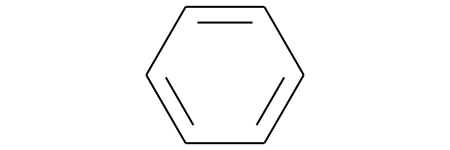

In [5]:
# in a local notebook where rdkit is properly installed, 
# a `Mol` object will actually be represented as a picture when called
benzene

In [55]:
# reverse direction. The canonical is important!
Chem.MolToSmiles(benzene, canonical=True)

'c1ccccc1'

If you're not sure how to write the SMILES string for a molecule, Wikipedia has the entry for simple molecules, although it is more consistent to search it on [PubChem](https://pubchem.ncbi.nlm.nih.gov/) or [ChemSpider](https://chemspider.com). Try find the SMILES for:

1. Acetaldehyde
2. Benzonitrile

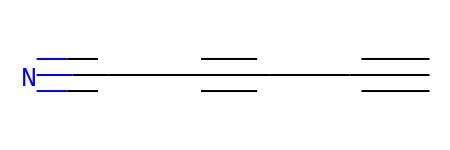

In [14]:
# HC5N
Chem.MolFromSmiles("C#CC#CC#N")

In [ ]:
# Fill me in!

In [ ]:
smiles = ["c1ccccc1", "C1=CC=C(C=C1)C#N", "CC=O"]

# write a for loop to convert all the SMILES strings into `Mol`s
mols = ...

### Molecular fingerprinting

While the SMILES representation certainly helps with mediating between humans and computers, it still isn't a very convenient way for machines to understand and quantify certain properties: SMILES encodes the structure and the connectivity, but to someone who doesn't know any chemistry at all it doesn't mean anything, and that's the position a computer is in. We need to go further in helping a computer _extract features_ from SMILES, which is telling it where and what to look for in a molecule.

"Molecular Fingerprinting" is a way to transform intermediate representations like SMILES into numeric vector representations based on certain properties (thus fingerprinting), which are then used to make comparisons and predictions.

In [16]:
Chem.RDKFingerprint(benzene)

In [15]:
array = np.empty(1)

print(array.shape)

DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(benzene), array)

print(f"This is what the array looks like: {array}")

print(f"The sum of the array actually suggests it's not all zeros: {array.sum()}")

print(f"Get the indices of where it's non-zero:\n {np.where(array != 0.)}")

(1,)
This is what the array looks like: [0. 0. 0. ... 0. 0. 0.]
The sum of the array actually suggests it's not all zeros: 12.0
Get the indices of where it's non-zero:
 (array([ 103,  161,  194,  294,  330,  792,  842, 1026, 1287, 1784, 1889,
       1907]),)


In [17]:
benzonitrile = Chem.MolFromSmiles("C1=CC=C(C=C1)C#N")

array = np.empty(1)

print(array.shape)

DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(benzonitrile), array)

print(f"This is what the array looks like: {array}")

print(f"The sum of the array actually suggests it's not all zeros: {array.sum()}")

print(f"Get the indices of where it's non-zero:\n {np.where(array != 0.)}")

(1,)
This is what the array looks like: [0. 0. 0. ... 0. 0. 0.]
The sum of the array actually suggests it's not all zeros: 63.0
Get the indices of where it's non-zero:
 (array([  50,  103,  146,  161,  194,  248,  287,  294,  305,  330,  337,
        411,  434,  441,  443,  475,  704,  730,  737,  744,  792,  798,
        820,  830,  842,  854,  855,  928,  930,  952,  977, 1013, 1026,
       1060, 1064, 1174, 1219, 1275, 1283, 1287, 1320, 1333, 1336, 1338,
       1343, 1456, 1545, 1553, 1577, 1692, 1694, 1699, 1784, 1806, 1816,
       1824, 1872, 1888, 1889, 1907, 1909, 1941, 2037]),)


In [19]:
acetaldehyde = Chem.MolFromSmiles("CC=O")

array = np.empty(1)

print(array.shape)

DataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(acetaldehyde), array)

print(f"This is what the array looks like: {array}")

print(f"The sum of the array actually suggests it's not all zeros: {array.sum()}")

print(f"Get the indices of where it's non-zero:\n {np.where(array != 0.)}")

(1,)
This is what the array looks like: [0. 0. 0. ... 0. 0. 0.]
The sum of the array actually suggests it's not all zeros: 6.0
Get the indices of where it's non-zero:
 (array([ 993, 1075, 1308, 1772, 1833, 1907]),)


## Measuring the similarity of molecules

From chemical intuition, we know that molecules are similar based on specific patterns and functional groups. 

In [32]:
benzene_array = np.empty(1)
benzene_fingerprint = Chem.RDKFingerprint(benzene)

acetaldehyde_array = np.empty(1)
acetaldehyde_fingerprint = Chem.RDKFingerprint(acetaldehyde)

benzonitrile_array = np.empty(1)
benzonitrile_fingerprint = Chem.RDKFingerprint(benzonitrile)

In [33]:
array_list = [benzene_fingerprint, benzonitrile_fingerprint, acetaldehyde_fingerprint]

In [35]:
DataStructs.FingerprintSimilarity(benzene_fingerprint, benzonitrile_fingerprint, metric=DataStructs.TanimotoSimilarity)

0.19047619047619047

In [36]:
DataStructs.FingerprintSimilarity(benzene_fingerprint, benzene_fingerprint, metric=DataStructs.TanimotoSimilarity)

1.0

In [37]:
DataStructs.FingerprintSimilarity(benzene_fingerprint, acetaldehyde_fingerprint, metric=DataStructs.TanimotoSimilarity)

0.058823529411764705

Cosine similarity

Euclidean distance

Molecular structure $\rightarrow$ SMILES $\rightarrow$ Fingerprint $\rightarrow$ Comparisons